# Import Data


In [1]:
import numpy as np

import xml.etree.ElementTree as ET
import pandas as pd
import os
import matplotlib.pyplot as plt
data=pd.read_csv(r'D:\project jay\data.csv')

# Stat of completeness

(array([8.4900e+02, 9.0000e+01, 1.9630e+03, 9.1750e+03, 3.5430e+04,
        8.6440e+04, 9.2406e+04, 4.9568e+04, 1.2641e+04, 7.7000e+02,
        1.0590e+03, 3.7240e+03, 6.0240e+03, 8.6970e+03, 1.0235e+04,
        6.3100e+03, 3.6320e+03, 1.3600e+03, 2.8100e+02, 3.2000e+01]),
 array([0.06012658, 0.09287975, 0.12563291, 0.15838608, 0.19113924,
        0.22389241, 0.25664557, 0.28939873, 0.3221519 , 0.35490506,
        0.38765823, 0.42041139, 0.45316456, 0.48591772, 0.51867089,
        0.55142405, 0.58417722, 0.61693038, 0.64968354, 0.68243671,
        0.71518987]),
 <a list of 20 Patch objects>)

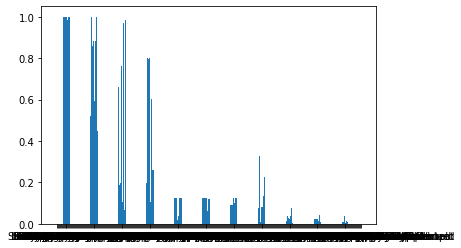

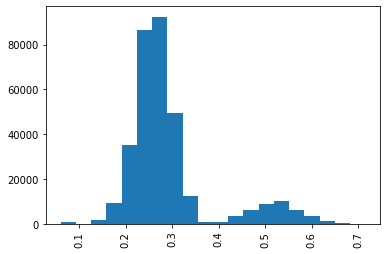

In [3]:

Flags=data.astype(str)!='[]'

Sum=Flags*1
Sums=Sum.apply(sum)
Sum2=Sum.sum(axis=1)
Paxis0=Sums/330686
Paxis1=Sum2/316
plt.bar(np.arange(len(Paxis0.index))*3,Paxis0,tick_label=Paxis0.index)
plt.figure()
plt.xticks(rotation=90)
plt.hist(Paxis1,bins=20)

# Year seperation and get completness per year 

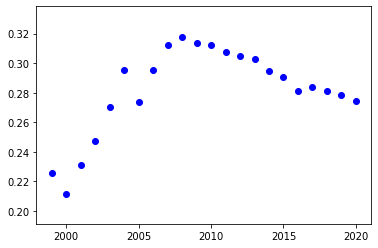

In [6]:
year=[]
for i in data['StudyFirstSubmitDate']:

    year.append(int(i[-6:-2]))
    
data['year']=year
data['comp%']=Paxis1
yealist=list(set(year))
yearcomp=[]
yearavg=[]

for yearn in yealist:
    datan=data[(data['year']==yearn)]
    yearcomp.append(datan['comp%'])
    yearavg.append(np.average(datan['comp%']))
plt.scatter(np.array(yealist), yearavg, color='blue')

# Run linear Regression on two period

Text(0, 0.5, 'completeness')

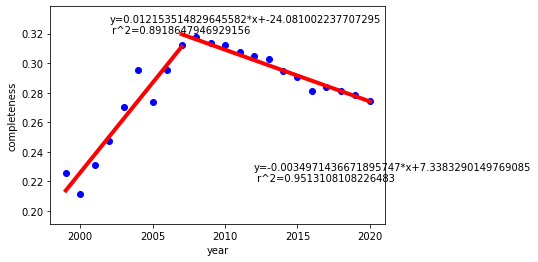

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr1 = linear_model.LinearRegression()
regr.fit(np.array(yealist[0:9]).reshape(-1,1),yearavg[0:9])
score1=regr.score(np.array(yealist[0:9]).reshape(-1,1),yearavg[0:9])
a1,b1=regr.coef_, regr.intercept_
regr1.fit(np.array(yealist[8:]).reshape(-1,1),yearavg[8:])
score2=regr1.score(np.array(yealist[8:]).reshape(-1,1),yearavg[8:])
a2,b2=regr1.coef_, regr1.intercept_
plt.scatter(np.array(yealist), yearavg, color='blue')
plt.plot( np.array(yealist[0:9]),regr.predict(np.array(yealist[0:9]).reshape(-1,1)), color='red', linewidth=4)
plt.plot( np.array(yealist[8:]),regr1.predict(np.array(yealist[8:]).reshape(-1,1)), color='red', linewidth=4)
plt.text(2002,0.32,"y="+str(a1[0])+"*x"+"+"+str(b1)+"\n r^2="+str(score1))
plt.text(2012,0.22,"y="+str(a2[0])+"*x"+"+"+str(b2)+"\n r^2="+str(score2))
plt.xlabel('year')
plt.ylabel('completeness')

# Num of records trend

In [29]:
num=[]
for n in yearcomp:
    num.append(len(n))

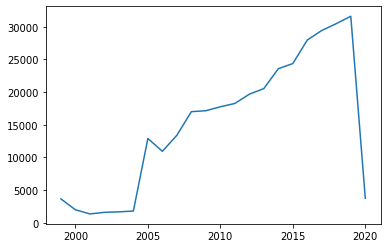

In [32]:
plt.figure()
plt.plot(yealist,num)